#### Importing some important libraries

In [1]:
from xml.etree import ElementTree as ET
import pandas as pd
import csv
import time
import numpy as np
from tqdm.notebook import tqdm_notebook 
from itertools import chain
from collections import Counter

import folium
from geopy.geocoders import Nominatim
from IPython.display import display

import re
from wordcloud import WordCloud, STOPWORDS

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0)

In [2]:
# pip install python-Levenshtein
# pip install folium

#### Please install the above package(s) if not installed already.

## 1. Task
<b>Please ensure the source data files are in the same location as this python file.</b>

1. First we need to read the data stored in xml file and convert each one of them into CSV format

In [3]:
xml_filenames = ['Badges.xml','Comments.xml','PostHistory.xml',\
                 'PostLinks.xml','Posts.xml','Tags.xml','Users.xml',\
                 'Votes.xml']
csv_filenames = ['Badges.csv','Comments.csv','PostHistory.csv',\
                 'PostLinks.csv','Posts.csv','Tags.csv','Users.csv',\
                 'Votes.csv']

Created 2 list variables for storing the names of the xml and csv files to read the data from xml and store it in the respective csv file.

Now we need to create a function to for reading the content of the xml file and converting it into csv format.

In [4]:
def ConvertXMLtoCSV(xml_filename,csv_filename):
    cols = []
    rows = []
    
    tree = ET.parse(xml_filename)
    root = tree.getroot()
    
    for child in root.iter('row'): 
        cols = list(child.attrib.keys())
        break
    
    with open(csv_filename, "w", newline="") as f:
        writer = csv.DictWriter(f, fieldnames=cols, restval='NA', \
                                extrasaction='ignore')
        writer.writeheader()

        for child in root.iter('row'):
                rows = {col_name: child.attrib.get(col_name,'NA') \
                        for col_name in cols}
                writer.writerow(rows)
    return True

The above function requires 2 input, the name of the xml file which needs to be read and the csv file in which the data needs to be stored. The function will iterate through all the elements after the root node to first identify the names of the column using child.attrib.keys(). This will become the first row in the csv file. After that we create a csv file in write mode and add the column header row using writeheader() method. Next we iterate through all the child elements using child.attrib.get and also pass the name of the column (which is actually a tag in the xml file) and store the data in rows variable and the write it in the csv file using writerow method.

After defining the function above, it's to pass the xml and csv filenames in the above function.

In [5]:
start = time.time()
for i in range(len(xml_filenames)):
    print("Reading:", xml_filenames[i])
    if ConvertXMLtoCSV(xml_filenames[i],csv_filenames[i]) == True:
        print("Exporting:",csv_filenames[i] )
    else:
        print("Export failed")
end = time.time()
print("Export completed in ",round(end - start,2),"(s)")

Reading: Badges.xml
Exporting: Badges.csv
Reading: Comments.xml
Exporting: Comments.csv
Reading: PostHistory.xml
Exporting: PostHistory.csv
Reading: PostLinks.xml
Exporting: PostLinks.csv
Reading: Posts.xml
Exporting: Posts.csv
Reading: Tags.xml
Exporting: Tags.csv
Reading: Users.xml
Exporting: Users.csv
Reading: Votes.xml
Exporting: Votes.csv
Export completed in  298.35 (s)


All the xml files have been read and the corresponding csv file have been created and stored locally.

Next, we will read the csv files saved locally using read_csv method of pandas dataframe and create individual variables for each csv file.

2. Load the CSV files as pandas dataframes

In [6]:
Badges_df = pd.read_csv(csv_filenames[0])
Comments_df = pd.read_csv(csv_filenames[1])
PostHistory_df = pd.read_csv(csv_filenames[2])
PostLinks_df = pd.read_csv(csv_filenames[3])
Posts_df = pd.read_csv(csv_filenames[4])
Tags_df = pd.read_csv(csv_filenames[5])
Users_df = pd.read_csv(csv_filenames[6])
Votes_df = pd.read_csv(csv_filenames[7])

In [7]:
Badges_df.head(5)

,Id,UserId,Name,Date,Class,TagBased
0,1,1,Autobiographer,2011-11-30T18:10:25.763,3,False
1,2,2,Autobiographer,2011-11-30T18:15:25.777,3,False
2,3,3,Autobiographer,2011-11-30T18:15:25.777,3,False
3,4,5,Autobiographer,2011-11-30T18:45:38.023,3,False
4,5,7,Autobiographer,2011-11-30T18:45:38.023,3,False


In [8]:
Comments_df.head(5)

,Id,PostId,Score,Text,CreationDate,UserId,ContentLicense
0,7,8,2,Blake Edwards also did many classic serious fi...,2011-11-30T19:53:25.417,22.0,CC BY-SA 3.0
1,10,4,2,Interesting. I've always felt that the origina...,2011-11-30T19:55:16.103,29.0,CC BY-SA 3.0
2,11,3,0,Is that the hour plus long (and completely hil...,2011-11-30T20:10:44.410,10.0,CC BY-SA 3.0
3,19,17,0,I know that Lucas intended to dub someone else...,2011-11-30T21:53:34.327,36.0,CC BY-SA 3.0
4,20,17,0,@bazmegakapa - fair point. I've also added to...,2011-11-30T22:00:15.700,40.0,CC BY-SA 3.0


In [9]:
PostHistory_df.head(5)

,Id,PostHistoryTypeId,PostId,RevisionGUID,CreationDate,UserId,Text,ContentLicense
0,1,2,1,795c1d80-a1a4-463f-9ff9-5d670ddbc559,2011-11-30T19:15:54.070,11.0,Some comedian/actors are given creative freedo...,CC BY-SA 3.0
1,2,1,1,795c1d80-a1a4-463f-9ff9-5d670ddbc559,2011-11-30T19:15:54.070,11.0,To what extent were the central characters in ...,CC BY-SA 3.0
2,3,3,1,795c1d80-a1a4-463f-9ff9-5d670ddbc559,2011-11-30T19:15:54.070,11.0,<comedy>,CC BY-SA 3.0
3,4,2,2,1784653c-82cf-4a93-8fad-d76d873b7cf9,2011-11-30T19:37:10.510,31.0,"According to the [trivia on IMDb][1], Owen Wil...",CC BY-SA 3.0
4,5,2,3,4e779e91-b845-4434-81b1-1c13badaf401,2011-11-30T19:41:14.960,41.0,"In his Star Wars Episode 1 review/analysis, Mi...",CC BY-SA 3.0


In [10]:
PostLinks_df.head(5)

,Id,CreationDate,PostId,RelatedPostId,LinkTypeId
0,948,2011-12-01T16:34:41.333,65,90,1
1,1722,2011-12-04T06:07:21.050,99,33,1
2,1723,2011-12-04T06:07:21.050,99,53,1
3,3828,2011-12-09T16:14:42.213,382,328,1
4,4298,2011-12-10T15:26:10.283,387,334,1


In [11]:
Posts_df.head(5)

,Id,PostTypeId,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastEditorUserId,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,ContentLicense
0,1,1,2776.0,2011-11-30T19:15:54.070,31,8094.0,<p>Some comedians / actors are given creative ...,11.0,94442.0,2022-02-12T21:59:39.633,2022-02-12T21:59:39.633,To what extent were the actors in Wedding Cras...,<wedding-crashers>,2.0,0,CC BY-SA 4.0
1,2,2,NaN,2011-11-30T19:37:10.510,15,NaN,"<p>According to the <a href=""http://www.imdb.c...",31.0,NaN,NaN,2011-11-30T19:37:10.510,NaN,NaN,NaN,3,CC BY-SA 3.0
2,3,1,814.0,2011-11-30T19:41:14.960,30,1934.0,"<p>In his Star Wars Episode 1 <a href=""https:/...",41.0,70064.0,2019-05-15T02:23:45.307,2019-05-15T02:23:45.307,Evaluating characters by means of description,<analysis><star-wars>,2.0,2,CC BY-SA 4.0
3,4,1,120.0,2011-11-30T19:42:45.470,59,3784.0,<p>I'm a big fan of the Pink Panther movies (t...,22.0,22.0,2013-08-17T20:17:23.187,2020-11-18T17:05:17.490,"Was the original ""Pink Panther"" movie intended...",<comedy><the-pink-panther>,5.0,2,CC BY-SA 3.0
4,6,1,21.0,2011-11-30T19:44:55.593,16,8239.0,"<p>At the end of the movie, adult Jack (Sean P...",34.0,49.0,2013-06-06T12:05:01.613,2013-06-06T20:02:04.800,What does the ending of The Tree of Life mean?,<plot-explanation><analysis><ending><the-tree-...,2.0,0,CC BY-SA 3.0


In [12]:
Tags_df.head(5)

,Id,TagName,Count,ExcerptPostId,WikiPostId
0,1,comedy,67,280.0,279.0
1,2,analysis,1366,113.0,112.0
2,5,ending,320,233.0,232.0
3,8,the-tree-of-life,6,55014.0,55013.0
4,9,star-wars,429,74.0,73.0


In [13]:
Users_df.head(5)

,Id,Reputation,CreationDate,DisplayName,LastAccessDate,WebsiteUrl,Location,AboutMe,Views,UpVotes,DownVotes,AccountId
0,-1,1,2011-11-30T17:13:53.160,Community,2011-11-30T17:13:53.160,http://meta.stackexchange.com/,on the server farm,"<p>Hi, I'm not really a person.</p>\n\n<p>I'm ...",1326,5151,10051,-1.0
1,1,101,2011-11-30T18:09:56.207,Geoff Dalgas,2017-02-22T20:07:46.733,http://stackoverflow.com,"Corvallis, OR",<p>Dev #2 who helped create Stack Overflow cur...,3030,2,0,2.0
2,2,101,2011-11-30T18:10:38.663,Nick Craver,2021-09-28T20:49:25.133,https://nickcraver.com/blog/,"Winston-Salem, NC",<p>I am a Principal Software Engineer at Micro...,20,1,0,7598.0
3,3,101,2011-11-30T18:10:48.167,balpha,2022-10-21T12:34:42.110,https://social.balpha.de/@balpha,"Berlin, Germany",<p>My name is Benjamin Dumke-von der Ehe. I wo...,17,0,0,40051.0
4,4,587,2011-11-30T18:44:51.017,Katey HW,2012-09-28T14:57:42.303,http://www.twitter.com/KateyCHAOS,"New York, United States",<p>I am from Massachusetts but I have lived in...,62,5,5,482633.0


In [14]:
Votes_df.head(5)

,Id,PostId,VoteTypeId,CreationDate
0,1,1,2,2011-11-30T00:00:00.000
1,2,1,2,2011-11-30T00:00:00.000
2,3,1,2,2011-11-30T00:00:00.000
3,4,2,2,2011-11-30T00:00:00.000
4,5,3,2,2011-11-30T00:00:00.000


We have printed the first 5 rows of each of the 8 dataframes (or related xml files) to understand the data structure of each table.

3. Create at least five nontrivial data visualisations and/or tables, at least three of which are based
on the extraction of information from text (e.g., tags, keywords, locations, etc.).

#### A. Top 25 most popular tags

  0%|          | 0/11430 [00:00<?, ?it/s]

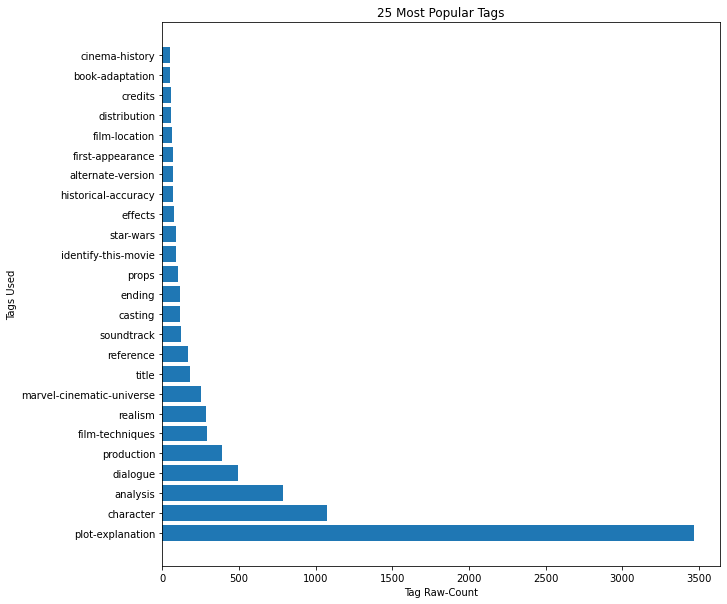

In [15]:
tags = list(Posts_df['Tags'].unique())
all_tags = []


for tag in tqdm_notebook(tags):
    if isinstance(tag, str):
        all_tags += tag.split(',')
        
split_list = [list(filter(None,string.split('>')[0].split('<')))\
              for string in all_tags]
flat_list = list(chain.from_iterable(split_list))


count_tags = Counter(flat_list)
tags = pd.DataFrame([list(count_tags.keys()), list(count_tags.values())])
tags = tags.transpose()
tags.columns = ['tag', 'count']
tags = tags.sort_values(by='count', ascending=False)

plt.barh(list(tags['tag'])[:25], list(tags['count'])[:25])
plt.ylabel('Tags Used')
plt.xlabel('Tag Raw-Count')
plt.title('25 Most Popular Tags')
plt.show()

In [16]:
tags

,tag,count
3,plot-explanation,3464
19,character,1071
1,analysis,786
59,dialogue,496
17,production,393
...,...,...
625,terminator-genisys,1
624,wet-hot-american-summer,1
623,everybody-loves-raymond,1
622,mission-impossible-rogue-nation,1


Plot-explanation is the most popular tag followed by character, analysis, dialogue and production. This goes to show the people are more interested in the in-depth analysis of a movie or a TV show rather than genre or technical aspect of it. In the Posts_df, the tag column had multiple values which were comma separated as well had other special characters like <,>. Hence, we had to split it 3 times and create a flat list and then count the occurence of each unique tag in that flat list and then display a horizontal bar chart.

#### B. Top 25 User Ids with badges

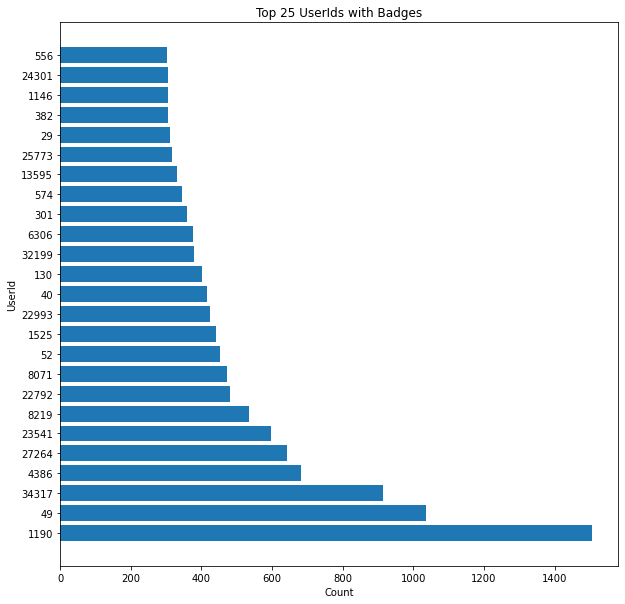

In [17]:
Badges_UserId_df = Badges_df.groupby('UserId').size().reset_index(name='count')
Badges_UserIds = Badges_UserId_df.sort_values(by='count', ascending=False)

plt.barh(Badges_UserIds['UserId'].astype(str)[:25], Badges_UserIds['count'][:25])

plt.ylabel('UserId')
plt.xlabel('Count')
plt.title('Top 25 UserIds with Badges')
plt.show()

Next, we are displaying the top 25 User IDs with the most number of badges. User ID 1190 had the most number of badges followed by 49, 34317, 4386 and 27264. In this visualization, we are referring to Badges_df dataframe and doing a groupby on the user ID column and the doing a count of those user IDs. Once the group by is done we are sorting the data on the count column.

#### C. Top 25 Users with badges

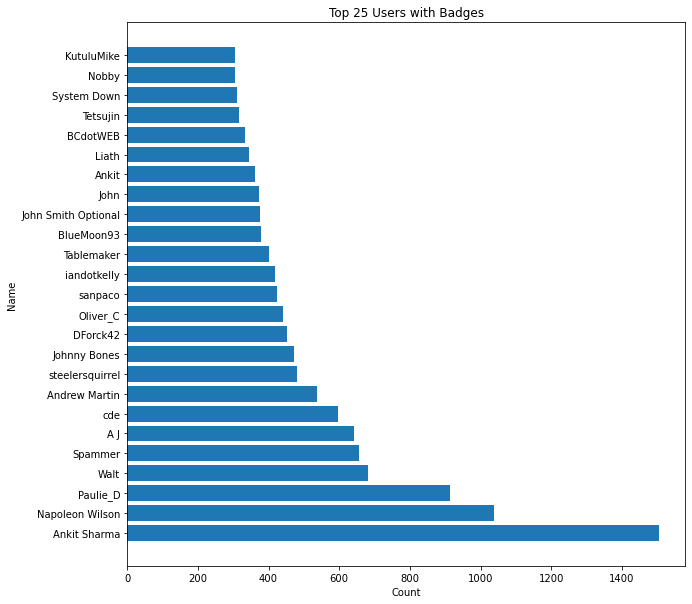

In [18]:
Badges_Users_df = Badges_df.merge(Users_df, how = "inner",\
                                  left_on='UserId', right_on='Id')
Badges_Users = Badges_Users_df.groupby('DisplayName').size()\
.reset_index(name='count')
Badges_Users = Badges_Users.sort_values(by='count', ascending=False)

plt.barh(Badges_Users['DisplayName'][:25], Badges_Users['count'][:25])

plt.ylabel('Name')
plt.xlabel('Count')
plt.title('Top 25 Users with Badges')
plt.show()

Instead of displaying the UserIDs, we are now showing the names of the user by merging Posts_df and Users_df and then doing a group by on DisplayName column. Rest of the process remains the same.

#### D. 25 Lowest/Highest Scoring Tags

In [19]:
tag_rate = Posts_df[['Tags', 'Score']].drop_duplicates().reset_index(drop=True)
tag_rate.head()

,Tags,Score
0,<wedding-crashers>,31
1,NaN,15
2,<analysis><star-wars>,30
3,<comedy><the-pink-panther>,59
4,<plot-explanation><analysis><ending><the-tree-...,16


In [20]:
tag_rate_df = pd.DataFrame(tag_rate)

#Splitting tags by ',', '>' and '<'
tag_rate_df = tag_rate_df.dropna(subset=['Tags'])
tag_rate_df['Tags'] = tag_rate_df['Tags'].str.split(',')
tag_rate_df['Tags'] = tag_rate_df['Tags']\
.apply(lambda x: [i.split(">")[0].split("<")[1] for i in x])

tag_rate_df['Tags'] = [str(i).strip('[]') for i in tag_rate_df['Tags']]

Tags_score_df = tag_rate_df.groupby('Tags')['Score'].agg(['mean']).reset_index()
Tags_score_df = Tags_score_df.sort_values(by='mean', ascending=True)
Tags_score_df

,Tags,mean
956,'scarface',-6.000000
624,'knight-rider',-6.000000
803,'oldboy',-5.000000
850,'pitch-perfect-2',-4.000000
666,'lord-of-the-flies',-4.000000
...,...,...
844,'peter-pan',42.000000
1082,'talk-shows',46.333333
416,'forrest-gump',46.750000
796,'o-brother-where-art-thou',48.000000


Text(0, 0.5, 'Tag')

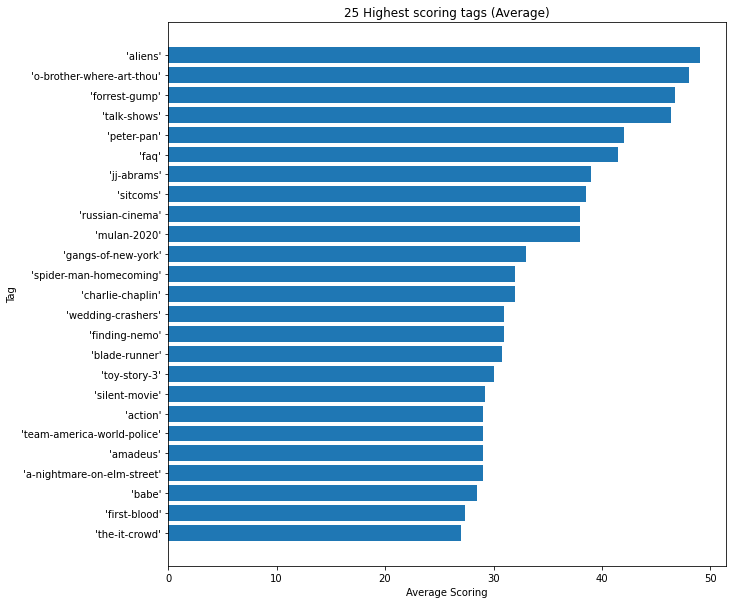

In [21]:
plt.barh(list(Tags_score_df['Tags'])[-25:], list(Tags_score_df['mean'])[-25:])
plt.xlabel('Average Scoring')
plt.title('25 Highest scoring tags (Average)')
plt.ylabel('Tag')

Text(0, 0.5, 'Tag')

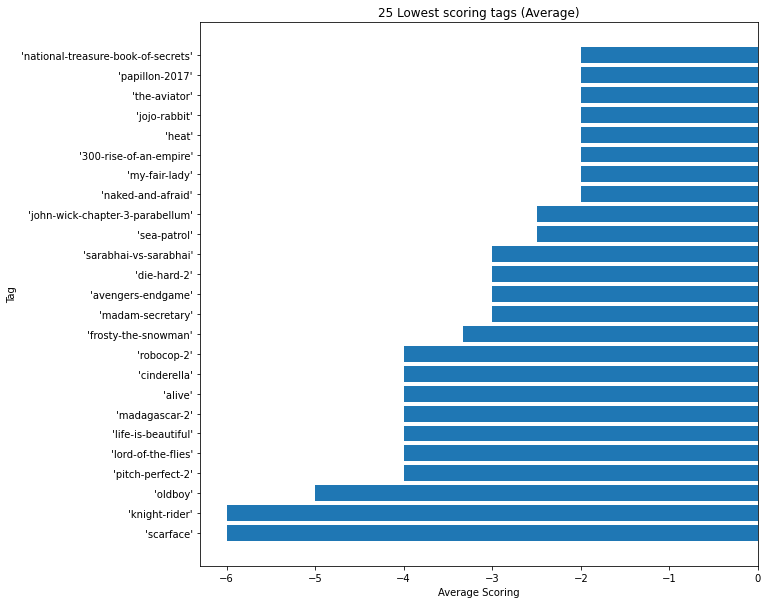

In [22]:
plt.barh(list(Tags_score_df['Tags'])[:25], list(Tags_score_df['mean'])[:25])
plt.xlabel('Average Scoring')
plt.title('25 Lowest scoring tags (Average)')
plt.ylabel('Tag')

In the above visualization, we are displaying the 25 highest and lowest scoring tags. There is a score column in the Posts_df dataframe. Since we just need, tags and score, we have created a separate dataframe 'tag_rate_df' for that and then we are splitting the tags columns (like before) and then calculating the mean score of each tag and storing it in Tags_score_df dataframe. The lowest scoring tags are scarface, knight-rider, oldboy, pitch-perfect-2 and lord-of-the-flies in that order and so on. Infact, they have negative scores. On the contrary, the highest scoring tags are alines, o-brother-where-art-thou	, forrest-gump, talk-shows, and peter-pan. 

In [23]:
Posts_df.sort_values(['CreationDate'],ascending=[True]).head(5)

,Id,PostTypeId,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastEditorUserId,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,ContentLicense
1607,2117,1,2118.0,2011-10-03T15:29:31.590,31,985.0,<p>The Harry Potter movies are clearly intende...,1326.0,49.0,2016-11-21T13:14:45.443,2016-11-21T13:14:45.443,How is the relationship between the reader and...,<book-adaptation><reception>,1.0,4,CC BY-SA 3.0
1608,2118,2,NaN,2011-10-03T22:37:18.387,22,NaN,"<p>For starters, it might help to think about ...",1214.0,NaN,NaN,2011-10-04T18:17:13.013,NaN,NaN,NaN,3,CC BY-SA 3.0
669,869,1,870.0,2011-11-27T05:06:24.723,54,14289.0,"<p>In the beginning of <em><a href=""http://www...",252.0,63980.0,2019-03-03T17:53:15.610,2019-03-03T17:53:15.610,Why did the girl try to kill herself in the 20...,<plot-explanation><sherlock-holmes-2009>,3.0,0,CC BY-SA 4.0
670,870,2,NaN,2011-11-27T13:58:08.990,41,NaN,"<p>I never saw a definitive explanation, but t...",235.0,571.0,2012-09-15T11:28:26.450,2012-09-15T11:28:26.450,NaN,NaN,NaN,1,CC BY-SA 3.0
0,1,1,2776.0,2011-11-30T19:15:54.070,31,8094.0,<p>Some comedians / actors are given creative ...,11.0,94442.0,2022-02-12T21:59:39.633,2022-02-12T21:59:39.633,To what extent were the actors in Wedding Cras...,<wedding-crashers>,2.0,0,CC BY-SA 4.0


#### E. Yearly count of questions

We want to know how many questions were created each year based on CreationDate and PostTypeId = 1 (for questions). This data is stored in Posts_df dataframe.

In [24]:
Posts_df['CreationDate'] = pd.to_datetime(Posts_df["CreationDate"])
Posts_df_min = Posts_df['CreationDate'].min()
Posts_df_max = Posts_df['CreationDate'].max()
Posts_df['Year'] = Posts_df['CreationDate'].dt.to_period('y')
post_count_q = Posts_df[(Posts_df.CreationDate>=Posts_df_min) & \
      (Posts_df.CreationDate < Posts_df_max)].query('PostTypeId == 1').\
groupby('Year').size().rename('count').to_frame()
post_count_q

,count
Year,
2011,194
2012,1343
2013,1659
2014,1799
2015,2396
2016,3222
2017,3693
2018,2435
2019,2289


<AxesSubplot:xlabel='Year'>

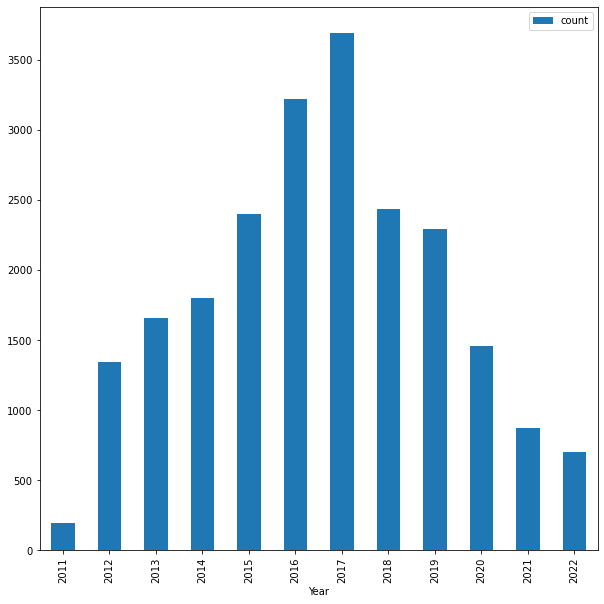

In [25]:
post_count_q.plot(kind='bar')

As we can see above, the highest number of questions were created in 2017, 2016 whereas 2018 and 2015 had almost similar number of questions. The least number of questions were posted in 2011 which could be attributed to the fact that the Movies and TV forum must have been launched in October whereas the number of questions have come down in last 2 years i.e. 2021 and 2022. If we ignore 2011, 2022 has the least number of questions posted despite the data being available till early December.

#### F. Number of responses in each year

In [26]:
Posts_df['Year'] = Posts_df['CreationDate'].dt.to_period('y')
post_count_a = Posts_df[(Posts_df.CreationDate>=Posts_df_min) & \
      (Posts_df.CreationDate < Posts_df_max)].query('PostTypeId == 2').\
groupby('Year').size().rename('count').to_frame()
post_count_a

,count
Year,
2011,261
2012,2218
2013,2717
2014,3266
2015,4290
2016,5399
2017,5948
2018,3705
2019,3726


<AxesSubplot:xlabel='Year'>

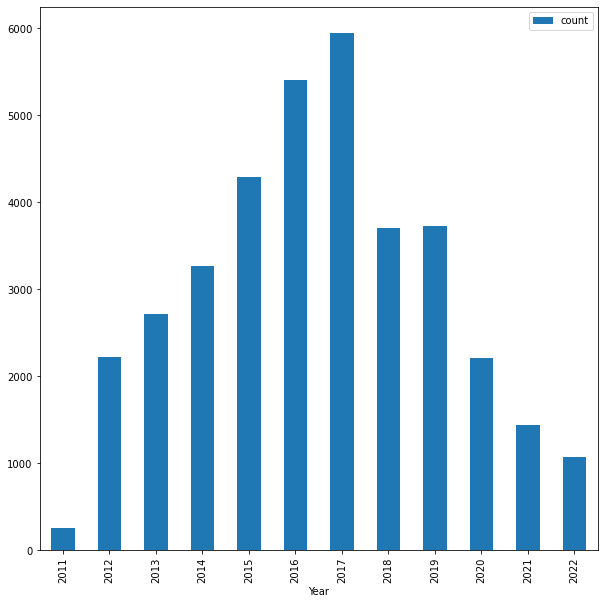

In [27]:
post_count_a.plot(kind='bar')

Just like most number of questions each year, the number of responses were highest in 2017, 2016 and then 2015. The same pattern follows with least number of responses in 2021 and 2022. In my opinion, one of the reasons could be the Movies & TV data exchange popularity has gone down or may be IMDBs popularity has risen. It would be interesting to do a similar analysis of IMDB dataset.

In [28]:
popular_tags_top10 = Tags_df.groupby('TagName').sum('Count').sort_values('Count',ascending=[False]).reset_index().head(10)
popular_tags_top10

,TagName,Id,Count,ExcerptPostId,WikiPostId
0,plot-explanation,32,8091,430.0,429.0
1,character,131,2336,4153.0,4152.0
2,analysis,2,1366,113.0,112.0
3,marvel-cinematic-universe,1417,1322,10482.0,10481.0
4,dialogue,842,916,8426.0,8425.0
5,identify-this-movie,78,861,165.0,164.0
6,game-of-thrones,576,797,3618.0,3617.0
7,production,462,682,7978.0,7977.0
8,film-techniques,40,540,1717.0,1716.0
9,realism,1128,487,8519.0,8518.0


#### G. For the top 10 tags, trace the history of the increase in the no. of posts 
#### a. Create a data series with the number of posts with the tag in each quarter

In [29]:
Posts_df['Tags_filled'] = Posts_df['Tags'].fillna('<>')
tag_name = []
tag_date = []
for tag in popular_tags_top10['TagName']:
    for index, row in Posts_df.iterrows():
        if tag in row['Tags_filled']:
            tag_name.append(tag)
            tag_date.append(row['CreationDate'])

d = {'tagName': tag_name, 'tagDate': tag_date}
tags_time = pd.DataFrame(d)
tags_time['Year'] = tags_time['tagDate'].map(lambda x: x.year)
tags_time['Quarter'] = tags_time['tagDate'].dt.quarter

tags_time2 = tags_time.groupby(['tagName','Year','Quarter'])['tagName'].\
            size().rename('tag_count').to_frame().reset_index()
tags_time2 = pd.pivot_table(tags_time2, values='tag_count', \
                            index=['Year','Quarter'], columns='tagName').fillna(0)

tags_time2.head(10)

tagName       analysis  character  dialogue  film-techniques  game-of-thrones  \
Year Quarter                                                                    
2011 4            41.0       13.0       3.0              5.0              0.0   
2012 1            36.0       11.0      11.0             12.0              0.0   
     2            39.0       27.0       9.0             17.0              5.0   
     3            42.0       36.0       7.0              3.0              1.0   
     4            26.0       36.0       9.0              7.0              2.0   
2013 1            37.0       46.0       9.0             29.0              1.0   
     2            30.0       32.0       6.0              8.0             19.0   
     3            30.0       46.0       5.0              8.0             15.0   
     4            46.0       64.0      15.0             22.0              1.0   
2014 1            40.0       35.0      13.0             14.0              2.0   

tagName       identify-this-movie  marvel-cinematic-universe  \
Year Quarter                                                   
2011 4                       12.0                        1.0   
2012 1                       36.0                        1.0   
     2                       16.0                       21.0   
     3                       19.0                        2.0   
     4                       20.0                        5.0   
2013 1                       28.0                        5.0   
     2                       18.0                       13.0   
     3                       38.0                       11.0   
     4                       37.0                       17.0   
2014 1                       36.0                        9.0   

tagName       plot-explanation  production  realism  
Year Quarter                                         
2011 4                    61.0         2.0      1.0  
2012 1                   114.0         2.0      4.0  
     2                   139.0        11.0      2.0  
     3                   108.0         6.0      4.0  
     4                   178.0        10.0      7.0  
2013 1                   106.0        18.0      5.0  
     2                   112.0         6.0      2.0  
     3                   153.0        11.0      7.0  
     4                   162.0        15.0      5.0  
2014 1                   141.0        11.0      2.0

#### b. Display distribution of Tags in each quarter of the year

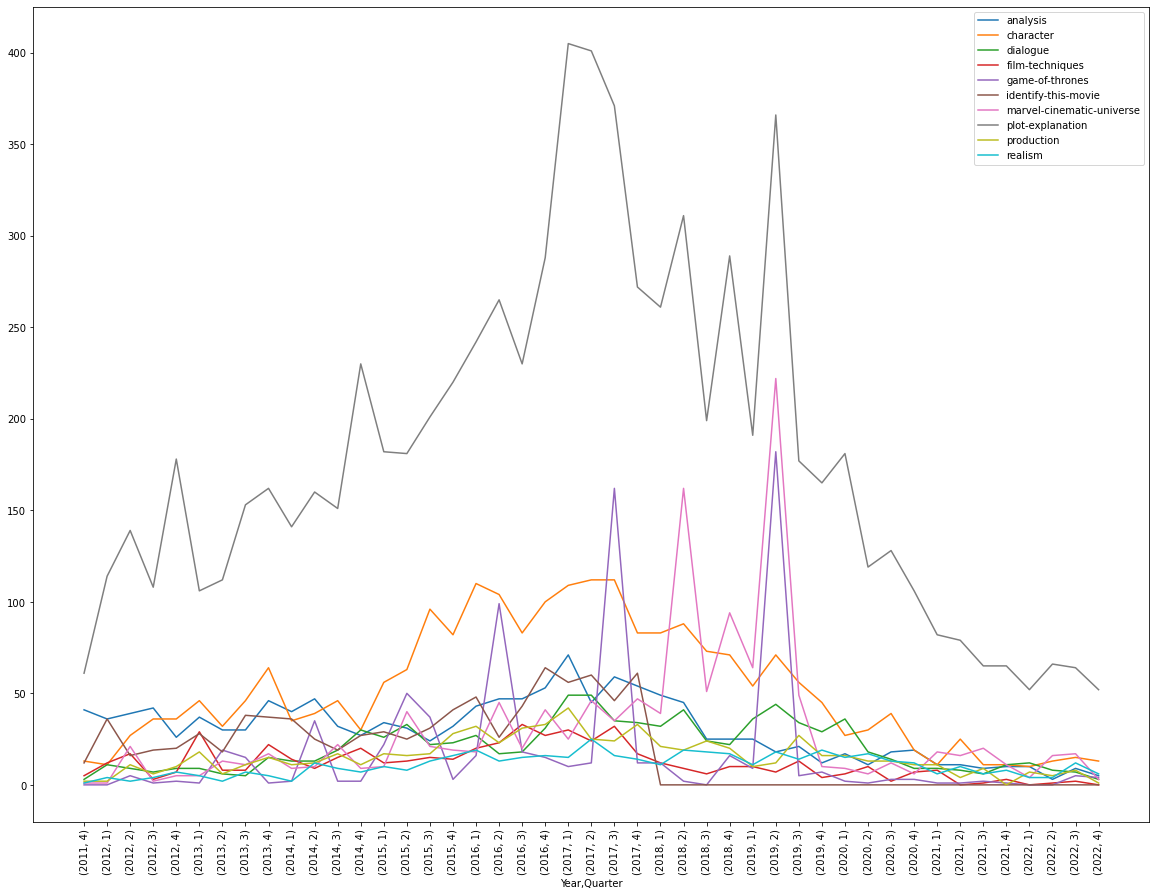

In [30]:
fig = tags_time2.plot(figsize=(20,15))
plt.legend(tags_time2[1:])
plt.xticks(np.arange(0,45,1), rotation=90)
fig.set_xticklabels(labels=tags_time2.index)
plt.show(fig)

The above multi-line comparative chart of top 10 tags represent the no. of times a tag was added in each quarter each year. Plot-Explanation remains the most trending tag of all and not once any other tag became the highest performing tag. Other tags like marvel-cinematic-experience and game-of-thrones became the 2nd most trending tags in their respective year and quarter which co-incided with their release timeline.

#### H. Movies and/or TV series in which users most often ask for an explanation of the plot

In [31]:
tags = []
tag = 'plot-explanation'
for index, row in Posts_df.iterrows():
    if tag in row['Tags_filled']:
        tags.append(row['Tags_filled'])

movies = []
for elem in tags:
    elem = elem.split('><')
    elem[-1] = elem[-1][:-1]
    movies.append(elem[-1])
    
movies_df = pd.DataFrame(movies).rename(columns={0:'title'})
movies_df.groupby('title').size().rename('count').to_frame().reset_index().\
    sort_values('count',ascending=False).head(10)

,title,count
777,game-of-thrones,366
330,breaking-bad,119
194,avengers-infinity-war,109
193,avengers-endgame,99
1708,sherlock,91
979,interstellar,84
962,inception,62
1992,the-dark-knight-rises,43
2046,the-flash,43
2380,the-walking-dead,41


If we just try to understand which movies or TV series were the most sought after in terms of plot-explanation, clearly game-of-thrones was the no. 1 followed by breaking-bad and avengers-infinity-war.

#### I. Weekly and hourly distribution of forum activity (based on creation date of posts and comments)

<AxesSubplot:xlabel='weekday,hour'>

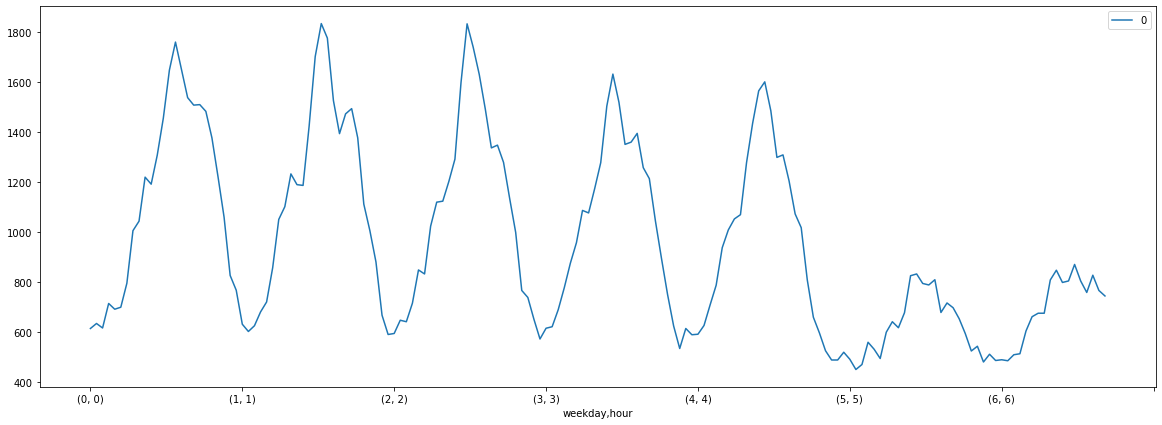

In [32]:
union_dfs = pd.concat([Comments_df, Posts_df], ignore_index=True)
union_dfs['CreationDate'] = pd.to_datetime(union_dfs['CreationDate'])
union_dfs['weekday'] = union_dfs['CreationDate'].dt.weekday
union_dfs['hour'] = union_dfs['CreationDate'].dt.hour
tbl = union_dfs.groupby(['weekday','hour']).size().to_frame()
tbl.plot(figsize=(20,7))

Next we have combined all the comments and post together and then see the trend based on the creation date. Most of the comments and posts are usually posted from Sunday (0 means Sunday) to Thursday (4 means Thursday). The peak reaches in the around mid-day for the first 5 days. We can also see that the people usually don't post much on Fridays' and Saturdays'.

#### J. Monthly distribution of activity since the beginning of the forum's existence

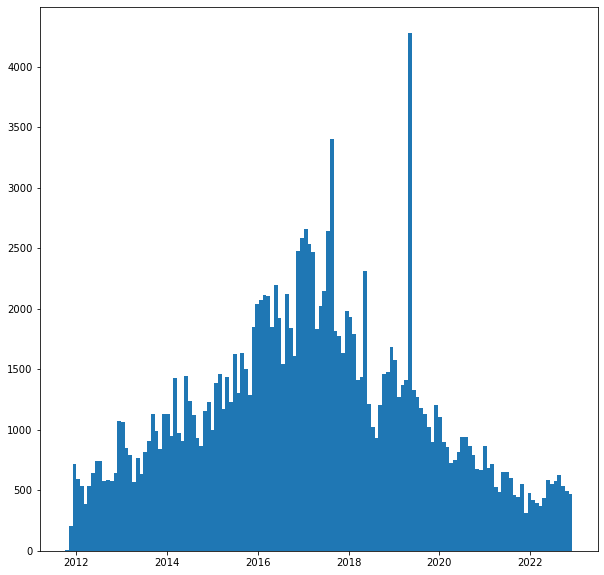

In [33]:
plt.hist(union_dfs['CreationDate'],\
         bins=int((union_dfs['CreationDate'].max()\
                   -union_dfs['CreationDate'].min()).days/30))
plt.rcParams['figure.figsize']=[20,7]
plt.show()

Next, we look the same data on an yearly basis and quite clearly the data shows that most of the acitivity happened during 2016-2018 period. Their is a steady increase from 2012 upto 2017. Post 2020 there is decline which we also saw in the No. of questions and No. of answers chart above.

#### K. User's Location from each country

In [34]:
def Count_User_Country(Location,Country):
    count_dict = {}

    User_count = 0

    for element in Country:
        for ele in Location:
            if type(ele) is str:
                if element in ele:
                    count_dict[element] = count_dict.get(element, 0) + 1

    User_count = sum(count_dict.values())
    return User_count

In [35]:
Location = list(Users_df['Location'].unique())
Users_from_USA = ['OR','NC','United States','USA','CA','SC','MN','TX',\
                  'GA','FL','HI','Illinois','IL','Indiana','Ohio','MO',\
                  'Missouri','NJ','Texas','ND','California','CO','NYC',\
                 'RI','DC','UT']
Users_from_Canada = ['Canada']
Users_from_UK = ['UK','United Kingdom']
Users_from_Germany = ['Germany','Deutschland']
Users_from_Belgium = ['Belgium']
Users_from_India = ['India','india','IND','Goa','pune']
Users_from_China = ['China']
Users_from_Netherlands = ['Netherlands','Nederlands']
Users_from_Egypt= ['Egypt']
Users_from_Iran = ['Iran']
Users_from_Hungary = ['Hungary']
Users_from_Russia = ['Russia']
Users_from_Spain = ['Spain']
Users_from_Italy = ['Italy']
Users_from_Thailand = ['Thailand']
Users_from_Australia = ['Australia']
Users_from_Poland = ['Poland','Polska']
Users_from_Switzerland = ['Switzerland','Zurich']
Users_from_Argentina = ['Argentina']
Users_from_Brazil = ['Brazil','Brasil']
Users_from_Mexico = ['Mexico']
Users_from_Ukraine = ['Ukraine']
Users_from_SA = ['South Africa']
Users_from_Singapore = ['Singapore']
Users_from_Japan = ['Japan']

In [36]:
USA_User_Count = Count_User_Country(Location,Users_from_USA)
# print("Count of user's from USA:", USA_User_Count)

Canada_User_Count = Count_User_Country(Location,Users_from_Canada)
# print("Count of user's from Canada:", Canada_User_Count)

UK_User_Count = Count_User_Country(Location,Users_from_UK)
# print("Count of user's from UK:", UK_User_Count)

Germany_User_Count = Count_User_Country(Location,Users_from_Germany)
# print("Count of user's from Germany:", Germany_User_Count)

Belgium_User_Count = Count_User_Country(Location,Users_from_Belgium)
# print("Count of user's from Belgium:", Belgium_User_Count)

India_User_Count = Count_User_Country(Location,Users_from_India)
# print("Count of user's from India:", India_User_Count)

China_User_Count = Count_User_Country(Location,Users_from_China)
# print("Count of user's from China:", China_User_Count)

Netherlands_User_Count = Count_User_Country(Location,Users_from_Netherlands)
# print("Count of user's from Netherlands:", Netherlands_User_Count)

Egypt_User_Count = Count_User_Country(Location,Users_from_Egypt)
# print("Count of user's from Egypt:", Egypt_User_Count)

Iran_User_Count = Count_User_Country(Location,Users_from_Iran)
# print("Count of user's from Iran:", Iran_User_Count)

Hungary_User_Count = Count_User_Country(Location,Users_from_Hungary)
# print("Count of user's from Hungary:", Hungary_User_Count)

Russia_User_Count = Count_User_Country(Location,Users_from_Russia)
# print("Count of user's from Russia:", Russia_User_Count)

Spain_User_Count = Count_User_Country(Location,Users_from_Spain)
# print("Count of user's from Spain:", Spain_User_Count)

Italy_User_Count = Count_User_Country(Location,Users_from_Italy)
# print("Count of user's from Italy:", Italy_User_Count)

Thailand_User_Count = Count_User_Country(Location,Users_from_Thailand)
# print("Count of user's from Thailand:", Thailand_User_Count)

Australia_User_Count = Count_User_Country(Location,Users_from_Australia)
# print("Count of user's from Australia:", Australia_User_Count)

Poland_User_Count = Count_User_Country(Location,Users_from_Poland)
# print("Count of user's from Poland:", Poland_User_Count)

Switzerland_User_Count = Count_User_Country(Location,Users_from_Switzerland)
# print("Count of user's from Switzerland:", Switzerland_User_Count)

Argentina_User_Count = Count_User_Country(Location,Users_from_Argentina)
# print("Count of user's from Argentina:", Argentina_User_Count)

Brazil_User_Count = Count_User_Country(Location,Users_from_Brazil)
# print("Count of user's from Brazil:", Brazil_User_Count)

Mexico_User_Count = Count_User_Country(Location,Users_from_Mexico)
# print("Count of user's from Mexico:", Mexico_User_Count)

Ukraine_User_Count = Count_User_Country(Location,Users_from_Ukraine)
# print("Count of user's from Ukraine:", Ukraine_User_Count)

SA_User_Count = Count_User_Country(Location,Users_from_SA)
# print("Count of user's from South Africa:", SA_User_Count)

Singapore_User_Count = Count_User_Country(Location,Users_from_Singapore)
# print("Count of user's from Singapore:", Singapore_User_Count)

Japan_User_Count = Count_User_Country(Location,Users_from_Japan)
# print("Count of user's from Japan:", Japan_User_Count)

In [37]:

# Create a dataframe with country names and their respective counts
data = {'Country':['USA','Canada','UK','Germany','Belgium','India',\
                   'China','Netherlands','Egypt','Iran','Hungary',\
                   'Russia','Spain','Italy','Thailand','Australia',\
                  'Poland','Switzerland','Argentina','Brazil',\
                  'Mexico','Ukraine','South Africa','Singapore',\
                  'Japan'],
        'User_Count':[USA_User_Count,Canada_User_Count,UK_User_Count,\
                      Germany_User_Count,Belgium_User_Count,India_User_Count,\
                     China_User_Count,Netherlands_User_Count,Egypt_User_Count,\
                     Iran_User_Count,Hungary_User_Count,Russia_User_Count,\
                     Spain_User_Count,Italy_User_Count,Thailand_User_Count,\
                     Australia_User_Count,Poland_User_Count,Switzerland_User_Count,\
                     Argentina_User_Count,Brazil_User_Count,Mexico_User_Count,\
                     Ukraine_User_Count,SA_User_Count,Singapore_User_Count,\
                     Japan_User_Count]}
Country_Wise_User_Count = pd.DataFrame(data)

# Initialize the geolocator
geolocator = Nominatim(user_agent="myGeocoder")

# Create a map object centered on the coordinates (0,0)
world_map = folium.Map(location=[0,0], zoom_start=2)

# Iterate through the dataframe and add a marker for each country
   
for i in range(0, len(Country_Wise_User_Count)):
    # Get the coordinates of the country
    location = geolocator.geocode(Country_Wise_User_Count.iloc[i]['Country'])
    if location:
        folium.CircleMarker(
            location=[location.latitude, location.longitude],
            # The radius of the marker is proportional to the count
            radius=Country_Wise_User_Count.iloc[i]['User_Count']/100, 
            # popup=folium.Popup(Country_Wise_User_Count.iloc[i]['Country']\
            # + ': ' + str(Country_Wise_User_Count.iloc[i]['User_Count']), \
            # max_width=250),
            color='crimson',
            fill_color='crimson'
        ).add_child(
            folium.Popup(Country_Wise_User_Count.iloc[i]['Country'] \
                         + ' '+str(Country_Wise_User_Count.iloc[i]['User_Count']))
        ).add_to(world_map)

# Show the map
world_map.save("world_map.html")
            
display(world_map)

We are now looking at a world map of users from each country. Most no. of users are USA, India, and UK (in that order). One of the gaps in the user dataframe is that in some cases, Locations are not very clear i.e it doesn't following City, State, Country pattern or in some cases users have given ambiguous locations  or put a crypting messgae. It can be due to a free flowing text field and not a selection of city, state and country. Nevertheless, what we have tried to do is to create all possible combinations of locations of each country and their respective count. For instance, NYC, NY or CO and so on are states of USA. Same way some users have written United States and some have written USA, some have given a shortened state name and some have given expanded names. The point here is to find the count of users (there may be some duplicates or some misses because of large number of states). The whole intent of the above map is to show number of users from each country and you can even click the circle to get the count.

Disclaimer: I have also not considered many countries since it is would have been a nightmare of scan the entire data dump to find out countries, and/or state and derive the country, and/or city and derive the country.

#### L. Word Cloud representation of the content in the Posts

In [38]:
# Define the body column
body_col = Posts_df['Body'].dropna()
body_col = body_col[body_col.apply(lambda x: isinstance(x, str))]

# Removing all un-wanted symbols and special characters
pat = re.compile("<.*?>")
list_of_lists = body_col[:1].str.replace(pat,'')\
.str.replace('|'.join(['\n',"\'","<p>","/","&quot;",",","!","-"]),'').tolist()
flat_list = [word for sublist in list_of_lists for word in sublist.split()]
flat_list = [x.lower() for x in flat_list] # convert all words into a smallcase.
flat_list = [word.replace(".", "").replace("(", "")\
             .replace(")","").replace("?","").replace("{","").replace("}","") 
             for word in flat_list] # replace .()? with ''
# replace " before and after a word with ''
flat_list = [re.sub('"', '', i) for i in flat_list] 

/var/folders/31/mntbwvv97f9b6y8w30p020b00000gn/T/ipykernel_75963/2312953901.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  list_of_lists = body_col[:1].str.replace(pat,'')\


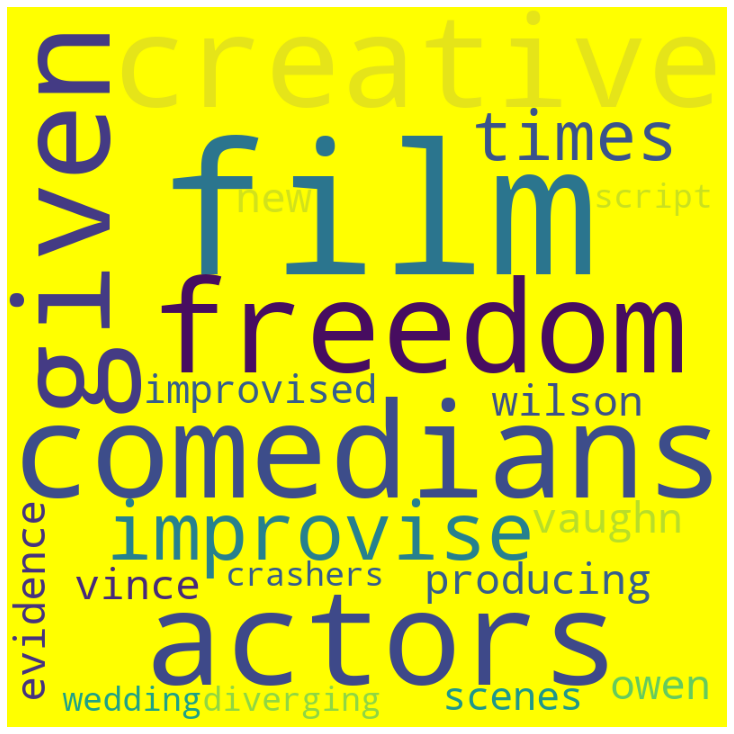

In [39]:
comment_words = ''
stopwords = set(STOPWORDS)
# print(stopwords)

# for val in Posts_df.Body:
for val in flat_list:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='yellow',
                stopwords = stopwords,
                min_font_size = 5).generate(comment_words)

# plot the WordCloud image                      
plt.figure(figsize = (15, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

The most commonly used words are: film, comedians, actors, given, and creative.

<b>Summary</b>:

Following data set has been chosen for this exercise: Movies and TV Data Exchange. This site consists of around 22k+ questions and 36k answers. The site is more than 11 years old. Based on the data conversion and pre-processing done, following data visualizations have been created:

<b>1</b>. We have created multiple visualizations from the following dataframes: Posts, Badges, Users, Comments.<br>
<b>2</b>. We have also covered following at-least 3 text related extractions: top 25 tags, Users from each country based on location, and <br>
<b>3</b>. Following visualizations and/or tables were created: <br>
<b>a</b>. 25 most popular tags. <br>
<b>b</b>. Top 25 UserIds with Badges. <br>
<b>c</b>. Top 25 Users with Badges. <br>
<b>d</b>. 25 Lowest Scoring Tags. <br>
<b>e</b>. 25 Highest Scoring Tags. <br>
<b>f</b>. Yearly Count of questions. <br>
<b>g</b>. No. of responses in each year. <br>
<b>h</b>. Display distribution of tags in each quarter of the year. <br>
<b>i</b>. Weekly and Hourly distribution of forum activity. <br>
<b>j</b>. Monthly distribution of activity since the beginning of the forum's existence. <br>
<b>k</b>. User's Location from each country. <br>
<b>k</b>. Word Cloud representation.

<b>Privacy Concerns</b>:<br>
<b>1</b>. The first major privacy concern is the User's data table has location and DisplayName. For e.g. how many Geoff Dalgas would be living in Corvallis, OR (OR stands for Oregon state in USA). Not many. <br>
<b>2</b>. Next some of these columns in User's data table could have been masked. Fortunately, there is no addresses or latitude and longitude details but still it would not take much for an expert hacker to find out the exact address of some or most of the users based on Location, DisplayName and/or AboutMe. <br>
<b>3</b>. Even AboutMe column could be have been dropped. Infact, DisplayName is also not required as we can easy visualize the top 25 users with badges using the User ID column. <br>
<b>4</b>. Obviously, this is a publicly available data set for educational purpose but it can lead to several privacy breaches including impersonation on other social media platforms. There is no anonymization or masking or dropping of personal identifiable information such as AboutMe and DisplayName. You infact don't even need City and State. Just Country information would be sufficient to create world map of user's from each of these countries.